In [1]:
#Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import math
import nltk
from nltk.corpus import stopwords
import contractions
import inflect
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
import re, string, unicodedata
from collections import  Counter
import spacy
from operator import itemgetter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#Reading the Data
data = pd.read_csv("EDA_assignment.csv")
data

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregar...,119236,NaN
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm su...,119238,NaN
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've...,119243,119240.0
...,...,...,...,...,...,...,...
88,119330,105859,True,Wed Oct 11 13:50:42 +0000 2017,@105860 I wish Amazon had an option of where I...,119329,119331.0
89,119331,105860,True,Wed Oct 11 13:47:14 +0000 2017,They reschedule my shit for tomorrow https://t...,119330,NaN
90,119332,Tesco,False,Wed Oct 11 13:34:06 +0000 2017,"@105861 Hey Sara, sorry to hear of the issues ...",119333,119334.0
91,119333,105861,True,Wed Oct 11 14:05:18 +0000 2017,@Tesco bit of both - finding the layout cumber...,"119335,119336",119332.0


In [3]:
#Applying Filter based conditions
data[(data['author_id']=="British_Airways")]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
25,119264,British_Airways,False,Wed Oct 11 13:36:31 +0000 2017,@105842 We're sorry your flight has been delay...,NaN,119265.0
62,119266,British_Airways,False,Wed Oct 11 13:37:15 +0000 2017,"@105842 I appreciate it's after 15:30 now, so ...",119302,119265.0
64,119303,British_Airways,False,Wed Oct 11 16:28:34 +0000 2017,@105842 Very sorry to hear this. We hope you ...,NaN,119302.0


In [4]:
#Applying Filter based conditions
data[(data['author_id']=="VirginTrains")]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0
5,119243,VirginTrains,False,Tue Oct 10 15:25:14 +0000 2017,"@105836 Have you tried from another device, Mi...",119244,119241.0
7,119245,VirginTrains,False,Tue Oct 10 15:33:22 +0000 2017,"@105836 It's working OK from here, Miriam. Doe...",NaN,119244.0
9,119246,VirginTrains,False,Tue Oct 10 10:13:19 +0000 2017,@105836 That's what we're here for Miriam 😊 T...,119242,119247.0


In [5]:
#Applying Filter based conditions
data[(data['author_id']=="Tesco")]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
68,119308,Tesco,False,Wed Oct 11 13:33:07 +0000 2017,"@105855 Hi Thomas, if a colleague believes the...",119309,119310.0
71,119311,Tesco,False,Wed Oct 11 13:28:34 +0000 2017,"@105855 Hi Thomas, this is correct but this he...","119310,119312",119313.0
73,119314,Tesco,False,Wed Oct 11 12:17:02 +0000 2017,"@105855 Hi Thomas, we operate a Think 25 polic...",119313,119315.0
75,119317,Tesco,False,Wed Oct 11 13:42:19 +0000 2017,"@105856 Hi there, could you try deleting your ...",119318,119319.0
77,119320,Tesco,False,Wed Oct 11 13:45:00 +0000 2017,"@105856 Hi there, as long as you sign out of y...",119321,119318.0
79,119322,Tesco,False,Wed Oct 11 13:49:29 +0000 2017,"@105856 Can you DM me your full name, address ...",NaN,119321.0
90,119332,Tesco,False,Wed Oct 11 13:34:06 +0000 2017,"@105861 Hey Sara, sorry to hear of the issues ...",119333,119334.0
92,119335,Tesco,False,Wed Oct 11 15:38:07 +0000 2017,@105861 If that doesn't help please DM your fu...,NaN,119333.0


In [6]:
#Applying Filter based conditions
data[(data['author_id']=="ChaseSupport")]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0


In [7]:
#Shape of the Data
data.shape

(93, 7)

In [8]:
#Information of the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 93 non-null     int64  
 1   author_id                93 non-null     object 
 2   inbound                  93 non-null     bool   
 3   created_at               93 non-null     object 
 4   text                     93 non-null     object 
 5   response_tweet_id        65 non-null     object 
 6   in_response_to_tweet_id  68 non-null     float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 4.6+ KB


In [9]:
#Describing the Data
data.describe()

,tweet_id,in_response_to_tweet_id
count,93.000000,68.000000
mean,119285.451613,119285.676471
std,28.314045,28.910795
min,119237.000000,119239.000000
25%,119262.000000,119259.750000
50%,119285.000000,119284.500000
75%,119309.000000,119311.500000
max,119335.000000,119334.000000


In [10]:
#Finding Null Values
data.isnull()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
88,False,False,False,False,False,False,False
89,False,False,False,False,False,False,True
90,False,False,False,False,False,False,False
91,False,False,False,False,False,False,False


In [11]:
#Sum of the Null values
data.isnull().sum()

tweet_id                    0
author_id                   0
inbound                     0
created_at                  0
text                        0
response_tweet_id          28
in_response_to_tweet_id    25
dtype: int64

In [12]:
#Sum of the NaN values
data.isna().sum()

tweet_id                    0
author_id                   0
inbound                     0
created_at                  0
text                        0
response_tweet_id          28
in_response_to_tweet_id    25
dtype: int64

In [13]:
#Replacing nan 'in_response_to_tweet_id' column by forward fill 
data['in_response_to_tweet_id']=data['in_response_to_tweet_id'].fillna(method='ffill', axis=0)

In [14]:
#Sum of the NaN values
data.isna().sum()

tweet_id                    0
author_id                   0
inbound                     0
created_at                  0
text                        0
response_tweet_id          28
in_response_to_tweet_id     1
dtype: int64

In [15]:
#Unique length of the Data
data.nunique()

tweet_id                   93
author_id                  42
inbound                     2
created_at                 93
text                       93
response_tweet_id          65
in_response_to_tweet_id    66
dtype: int64

In [16]:
#Type of Data
data.dtypes

tweet_id                     int64
author_id                   object
inbound                       bool
created_at                  object
text                        object
response_tweet_id           object
in_response_to_tweet_id    float64
dtype: object

/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


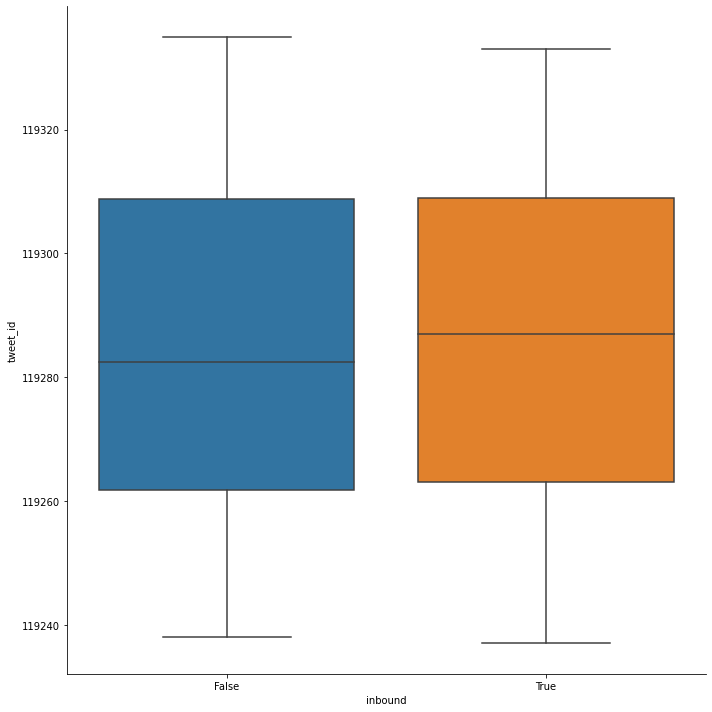

In [17]:
#Plotting BoxPlot for comparing tweet_id with inbound
sns.factorplot(data=data, x='inbound', y='tweet_id', kind='box', size=10)

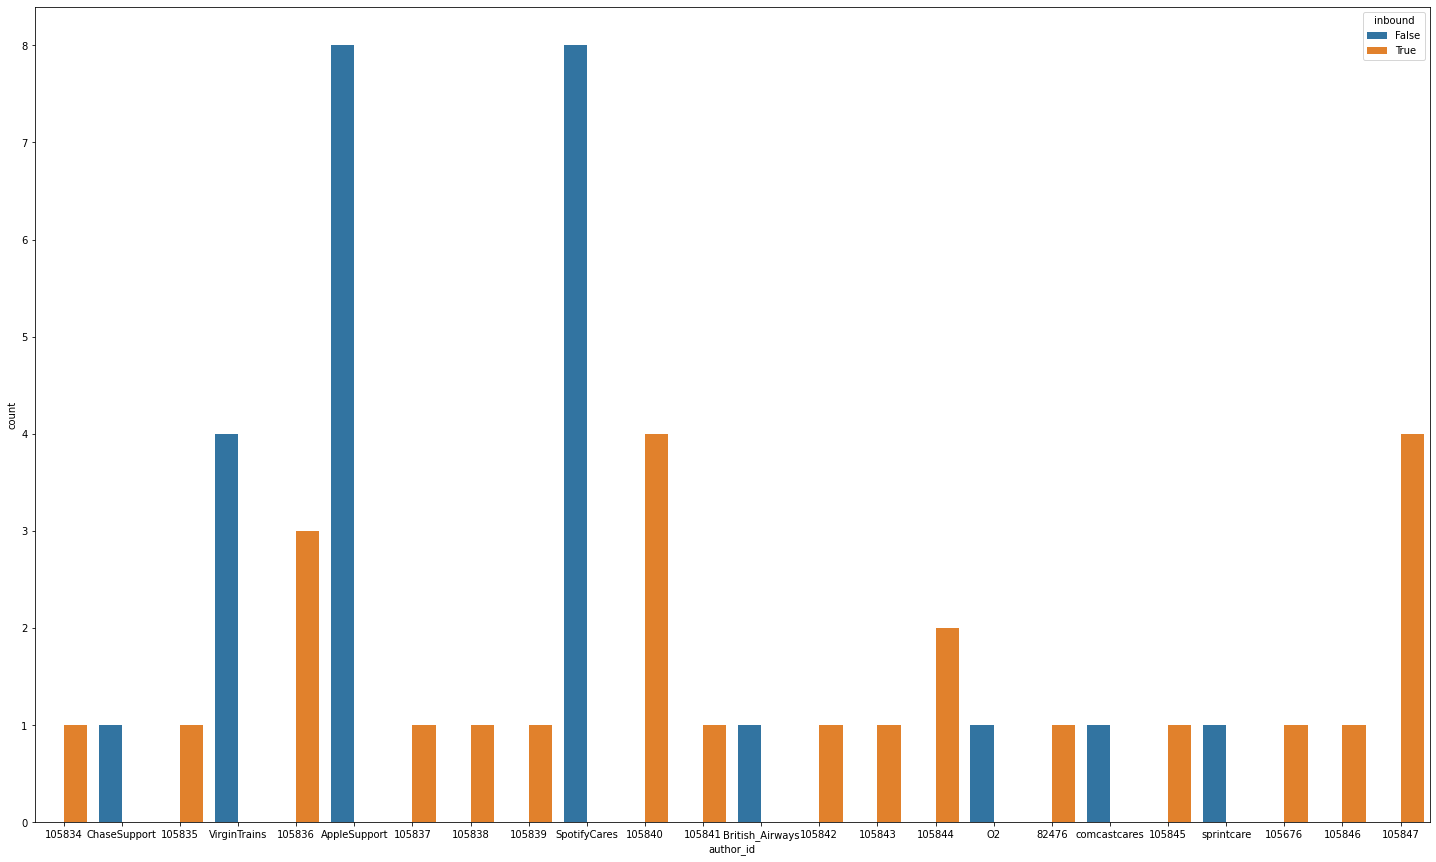

In [18]:
#Plotting CountPlot of inbound vs author_id for observing the counts of the inbound for author_id
fig = plt.figure(figsize=(25,15))
sns.countplot(x=data.author_id[:50], hue=data.inbound)
plt.show()

In [19]:
#Dropping duplicates
data.drop_duplicates(inplace=True)

In [20]:
# To remove HTML tag
def html_remover(data):
    """
    input: takes original text string from data

    output:
    removes HTML tag in the text prsent in the data

    """
    beauti = BeautifulSoup(data,'html.parser')
    return beauti.get_text()

In [21]:
#Removes HTML tag from original data
data['text_html_remover'] = data['text'].apply(lambda x:html_remover(x))
data['text_html_remover']

0     @AppleSupport causing the reply to be disregar...
1     @105835 Your business means a lot to us. Pleas...
2     @76328 I really hope you all change but I'm su...
3     @105836 LiveChat is online at the moment - htt...
4     @VirginTrains see attached error message. I've...
                            ...                        
88    @105860 I wish Amazon had an option of where I...
89    They reschedule my shit for tomorrow https://t...
90    @105861 Hey Sara, sorry to hear of the issues ...
91    @Tesco bit of both - finding the layout cumber...
92    @105861 If that doesn't help please DM your fu...
Name: text_html_remover, Length: 93, dtype: object

In [22]:
# To remove URL
def url_remover(data):
    
    """ 
    input: takes original text string from the data

    output:
    removes round brackets in the text present in the data

    """
    return re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ',data)

In [23]:
#Removes URl after removing HTML tag in the same data
data['text_url_remover'] = data['text_html_remover'].apply(lambda x:url_remover(x))
data['text_url_remover']


0     @AppleSupport causing the reply to be disregar...
1     @105835 Your business means a lot to us. Pleas...
2     @76328 I really hope you all change but I'm su...
3     @105836 LiveChat is online at the moment -   o...
4     @VirginTrains see attached error message. I've...
                            ...                        
88    @105860 I wish Amazon had an option of where I...
89               They reschedule my shit for tomorrow  
90    @105861 Hey Sara, sorry to hear of the issues ...
91    @Tesco bit of both - finding the layout cumber...
92    @105861 If that doesn't help please DM your fu...
Name: text_url_remover, Length: 93, dtype: object

In [24]:
#To remove brackets
def remove_round_brackets(data):
    
    """ 
    input: takes original text string from data

    output:
    removes round brackets in the text present in the data

    """
    return re.sub('\(.*?\)','',data)

In [25]:
#Removes brackets after removing URL in the same data
data['text_remove_brackets'] = data['text_url_remover'].apply(lambda x:remove_round_brackets(x))
data['text_remove_brackets'] 

0     @AppleSupport causing the reply to be disregar...
1     @105835 Your business means a lot to us. Pleas...
2     @76328 I really hope you all change but I'm su...
3     @105836 LiveChat is online at the moment -   o...
4     @VirginTrains see attached error message. I've...
                            ...                        
88    @105860 I wish Amazon had an option of where I...
89               They reschedule my shit for tomorrow  
90    @105861 Hey Sara, sorry to hear of the issues ...
91    @Tesco bit of both - finding the layout cumber...
92    @105861 If that doesn't help please DM your fu...
Name: text_remove_brackets, Length: 93, dtype: object

In [26]:
#To remove punctuations
def remove_punctuation(text):
    
    """ 
    input: takes original text string 

    output:
    removes punctuations in the text 

    """
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [27]:
#Removes punctuations after removing brackets in the same data
data['clean_msg']= data['text_remove_brackets'].apply(lambda x:remove_punctuation(x))
data['clean_msg']

0     AppleSupport causing the reply to be disregard...
1     105835 Your business means a lot to us Please ...
2     76328 I really hope you all change but Im sure...
3     105836 LiveChat is online at the moment    or ...
4     VirginTrains see attached error message Ive tr...
                            ...                        
88    105860 I wish Amazon had an option of where I ...
89               They reschedule my shit for tomorrow  
90    105861 Hey Sara sorry to hear of the issues yo...
91    Tesco bit of both  finding the layout cumberso...
92    105861 If that doesnt help please DM your full...
Name: clean_msg, Length: 93, dtype: object

In [28]:
#Replacing digits with string
data['clean_msg'] = data['clean_msg'].str.replace('\d+', '')

/tmp/ipykernel_8100/3313105304.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_msg'] = data['clean_msg'].str.replace('\d+', '')


In [29]:
#To remove spaces
def white_space(data):
    
    """ 
    input: takes original text string from the data

    output:
    removes spaces in the text present in the data

    """
    return ' '.join(data.split())

In [30]:
#Removes spaces after removing punctuations in the same data
data['white_space']= data['clean_msg'].apply(lambda x:white_space(x))
data['white_space']

0     AppleSupport causing the reply to be disregard...
1     Your business means a lot to us Please DM your...
2     I really hope you all change but Im sure you w...
3     LiveChat is online at the moment or contact op...
4     VirginTrains see attached error message Ive tr...
                            ...                        
88    I wish Amazon had an option of where I can jus...
89                 They reschedule my shit for tomorrow
90    Hey Sara sorry to hear of the issues you are h...
91    Tesco bit of both finding the layout cumbersom...
92    If that doesnt help please DM your full name a...
Name: white_space, Length: 93, dtype: object

In [31]:
#Lowering the text
def text_lower(data):
    
    """ 
    input: takes original text string from the data

    output:
    lowers the text in the data

    """
    return data.lower()

In [32]:
#Lowers the text after removing spaces in the same data
data['text_lower']= data['white_space'].apply(lambda x:text_lower(x))
data['text_lower']

0     applesupport causing the reply to be disregard...
1     your business means a lot to us please dm your...
2     i really hope you all change but im sure you w...
3     livechat is online at the moment or contact op...
4     virgintrains see attached error message ive tr...
                            ...                        
88    i wish amazon had an option of where i can jus...
89                 they reschedule my shit for tomorrow
90    hey sara sorry to hear of the issues you are h...
91    tesco bit of both finding the layout cumbersom...
92    if that doesnt help please dm your full name a...
Name: text_lower, Length: 93, dtype: object

In [33]:
#Replacing the contraction
def contraction_replace(data):
    
    """ 
     input: takes original text string from data

     output:
     replaces the contraction in string to text in the data

    """
    return contractions.fix(data)

In [34]:
#Replaces contractions after lowering text in the same data
data['text_contraction']= data['text_lower'].apply(lambda x:contraction_replace(x))
data['text_contraction']

0     applesupport causing the reply to be disregard...
1     your business means a lot to us please dm your...
2     i really hope you all change but i am sure you...
3     livechat is online at the moment or contact op...
4     virgintrains see attached error message i have...
                            ...                        
88    i wish amazon had an option of where i can jus...
89                 they reschedule my shit for tomorrow
90    hey sara sorry to hear of the issues you are h...
91    tesco bit of both finding the layout cumbersom...
92    if that does not help please dm your full name...
Name: text_contraction, Length: 93, dtype: object

In [35]:
#Getting a set of English stopWords by using nltk library
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rutvathaker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [36]:
#Getting words dictionary for stopwords
stopcorpus=[]
new= data['text_lower']
new=new.values
stopcorpus=[stopwords for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in stopcorpus:
    if word in stopwords:
        dic[word]+=1


In [37]:
#Length of stopwords
len(stopcorpus)

9179

/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x576 with 0 Axes>

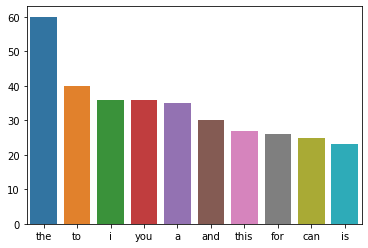

<Figure size 1440x576 with 0 Axes>

In [38]:
#plot for most occuring stopwords
stop=" ".join([i for i in data['text_lower'].values])
stop=" ".join([word for word in stop.split() if word in stopwords])

#Counting the StopWords
count={}
for word in stop.split():
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

#Plotting Barplot for most occuring StopWords by using stopwords dictionary
tw= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])
tw
sns.barplot(list(tw.keys()), list(tw.values()))
plt.figure(figsize=(20,8))




In [39]:
#Removing StopWords after replacing contractions in the same data
data['no_stopwords'] = data['text_contraction'].apply(lambda x:' '.join([i for i in x.split() if i not in stopwords]))
data['no_stopwords']

0     applesupport causing reply disregarded tapped ...
1     business means lot us please dm name zip code ...
2                               really hope change sure
3     livechat online moment contact option request ...
4     virgintrains see attached error message tried ...
                            ...                        
88    wish amazon option get shipped ups store avoid...
89                             reschedule shit tomorrow
90    hey sara sorry hear issues ask lay speed websi...
91    tesco bit finding layout cumbersome removing i...
92    help please dm full name address email includi...
Name: no_stopwords, Length: 93, dtype: object

In [40]:
#Removing the Emojis in the same data of removing stopwords
data['no_stopwords'] = data['no_stopwords'].astype(str).apply(lambda x: x.encode('latin-1', 'ignore').decode('latin-1'))
data['no_stopwords']

0     applesupport causing reply disregarded tapped ...
1     business means lot us please dm name zip code ...
2                               really hope change sure
3     livechat online moment contact option request ...
4     virgintrains see attached error message tried ...
                            ...                        
88    wish amazon option get shipped ups store avoid...
89                             reschedule shit tomorrow
90    hey sara sorry hear issues ask lay speed websi...
91    tesco bit finding layout cumbersome removing i...
92    help please dm full name address email includi...
Name: no_stopwords, Length: 93, dtype: object

In [41]:
#Stemming the Data
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

def stemming(text):
    
    """ 
    input: takes original text string 

    output:
    stemmed text

    """
    stems = " ".join([porter_stemmer.stem(word) for word in text.split()])
    return stems

In [42]:
#Stemming the data after removing stopwords in the same data
data['text_stemmed']=data['no_stopwords'].apply(lambda x: stemming(x))
data['text_stemmed']

0     applesupport caus repli disregard tap notif ke...
1     busi mean lot us pleas dm name zip code addit ...
2                                realli hope chang sure
3     livechat onlin moment contact option request c...
4     virgintrain see attach error messag tri leav v...
                            ...                        
88    wish amazon option get ship up store avoid lot...
89                              reschedul shit tomorrow
90    hey sara sorri hear issu ask lay speed websit ...
91    tesco bit find layout cumbersom remov item fav...
92    help pleas dm full name address email includ b...
Name: text_stemmed, Length: 93, dtype: object

In [43]:
#Lemmatizing the Data
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

word_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
     
    """ 
    input: takes original text string 

    output:
    lemmatized text

    """

    lemm_word=" ".join([word_lemmatizer.lemmatize(word) for word in text.split()])
    return lemm_word

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/rutvathaker/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/rutvathaker/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [44]:
#Lemmatizing the data after stemming in the same data
data['text_lemmatize']=data['text_stemmed'].apply(lambda x: lemmatizer(x))
data['text_lemmatize']


0     applesupport caus repli disregard tap notif ke...
1     busi mean lot u plea dm name zip code addit de...
2                                realli hope chang sure
3     livechat onlin moment contact option request c...
4     virgintrain see attach error messag tri leav v...
                            ...                        
88    wish amazon option get ship up store avoid lot...
89                              reschedul shit tomorrow
90    hey sara sorri hear issu ask lay speed websit ...
91    tesco bit find layout cumbersom remov item fav...
92    help plea dm full name address email includ br...
Name: text_lemmatize, Length: 93, dtype: object

In [45]:
#Finding sentence Length after lemmatizing in the same data
data['Sentence_length'] = data["text_lemmatize"].apply(lambda x: len(x.split()))
data['Sentence_length'].sort_values()

56     3
89     3
20     3
2      4
32     4
      ..
15    15
16    15
91    15
26    15
39    16
Name: Sentence_length, Length: 93, dtype: int64

In [46]:
data['Word_length'] = data['text_lemmatize'].apply(len)
data['Word_length'].sort_values()

2      22
72     22
89     23
5      25
56     25
     ... 
91     86
52     86
26     89
22     91
16    105
Name: Word_length, Length: 93, dtype: int64

In [47]:
#Getting words dictionary without stopwords
corpus=[]
new= data['no_stopwords'].str.split()
new=new.values.tolist()

#Creating corpus for words generating from the data
corpus=[word for i in new for word in i]

#Creating dictionary for words without stopwords
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1

In [48]:
#length of the words without stopwords
len(corpus)

924

<AxesSubplot:>

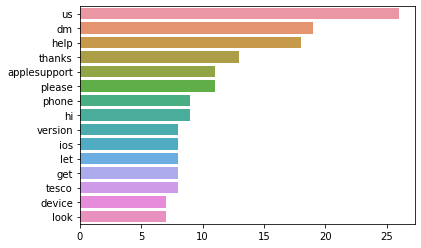

In [49]:
#Plotting for most occuring words
counter=Counter(corpus)
most=counter.most_common()

#Using counter,plotting the most common words from the corpus dictionary
x, y= [], []
for word,count in most[:15]:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [50]:
#Removing 3 length words from Data
data['nostopwords<3'] = data['no_stopwords'].str.replace(r'\b(\w{1,3})\b', '')
data['nostopwords<3']

/tmp/ipykernel_8100/1470542454.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['nostopwords<3'] = data['no_stopwords'].str.replace(r'\b(\w{1,3})\b', '')


0     applesupport causing reply disregarded tapped ...
1     business means   please  name  code additional...
2                               really hope change sure
3     livechat online moment contact option request ...
4     virgintrains  attached error message tried lea...
                            ...                        
88    wish amazon option  shipped  store avoid  stru...
89                             reschedule shit tomorrow
90     sara sorry hear issues   speed website respon...
91    tesco  finding layout cumbersome removing item...
92    help please  full name address email including...
Name: nostopwords<3, Length: 93, dtype: object

In [51]:
#Getting words dictionary after removing 3 length words from data without stopwords 
corpus_1=[]
new= data['nostopwords<3'].str.split()
new=new.values.tolist()

#Creating corpus for words after removing 3 length words generating from the data
corpus_1=[word for i in new for word in i]

#Creating dictionary for words after removing 3 length words without stopwords
from collections import defaultdict
dic=defaultdict(int)
for word in corpus_1:
    if word in stopwords:
        dic[word]+=1

<AxesSubplot:>

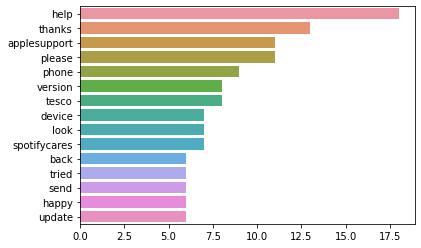

In [52]:
#Plot for most occuring words after removing 3 length words from data
counter=Counter(corpus_1)
most=counter.most_common()

#Using counter,plotting the most common words after removing 3 length word from the corpus dictionary
x, y= [], []
x, y= [], []
for word,count in most[:15]:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [53]:
#Reading the Data after preprocessing
data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,text_html_remover,text_url_remover,text_remove_brackets,clean_msg,white_space,text_lower,text_contraction,no_stopwords,text_stemmed,text_lemmatize,Sentence_length,Word_length,nostopwords<3
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregar...,119236,NaN,@AppleSupport causing the reply to be disregar...,@AppleSupport causing the reply to be disregar...,@AppleSupport causing the reply to be disregar...,AppleSupport causing the reply to be disregard...,AppleSupport causing the reply to be disregard...,applesupport causing the reply to be disregard...,applesupport causing the reply to be disregard...,applesupport causing reply disregarded tapped ...,applesupport caus repli disregard tap notif ke...,applesupport caus repli disregard tap notif ke...,8,57,applesupport causing reply disregarded tapped ...
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0,@105835 Your business means a lot to us. Pleas...,@105835 Your business means a lot to us. Pleas...,@105835 Your business means a lot to us. Pleas...,Your business means a lot to us Please DM you...,Your business means a lot to us Please DM your...,your business means a lot to us please dm your...,your business means a lot to us please dm your...,business means lot us please dm name zip code ...,busi mean lot us pleas dm name zip code addit ...,busi mean lot u plea dm name zip code addit de...,13,61,business means please name code additional...
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm su...,119238,119239.0,@76328 I really hope you all change but I'm su...,@76328 I really hope you all change but I'm su...,@76328 I really hope you all change but I'm su...,I really hope you all change but Im sure you ...,I really hope you all change but Im sure you w...,i really hope you all change but im sure you w...,i really hope you all change but i am sure you...,really hope change sure,realli hope chang sure,realli hope chang sure,4,22,really hope change sure
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0,@105836 LiveChat is online at the moment - htt...,@105836 LiveChat is online at the moment - o...,@105836 LiveChat is online at the moment - o...,LiveChat is online at the moment or contac...,LiveChat is online at the moment or contact op...,livechat is online at the moment or contact op...,livechat is online at the moment or contact op...,livechat online moment contact option request ...,livechat onlin moment contact option request c...,livechat onlin moment contact option request c...,8,54,livechat online moment contact option request ...
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've...,119243,119240.0,@VirginTrains see attached error message. I've...,@VirginTrains see attached error message. I've...,@VirginTrains see attached error message. I've...,VirginTrains see attached error message Ive tr...,VirginTrains see attached error message Ive tr...,virgintrains see attached error message ive tr...,virgintrains see attached error message i have...,virgintrains see attached error message tried ...,virgintrain see attach error messag tri leav v...,virgintrain see attach error messag tri leav v...,12,75,virgintrains attached error message tried lea...


/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentence_length'>

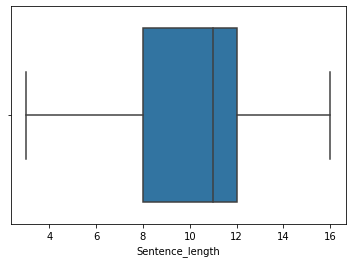

In [54]:
#boxplot for sentence length of tweets to look for outliers
sns.boxplot(data['Sentence_length'])

/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Word_length'>

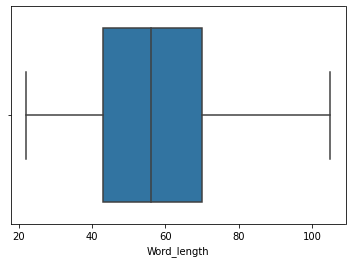

In [55]:
#boxplot for word length of tweets to look for outliers
sns.boxplot(data['Word_length'])

/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


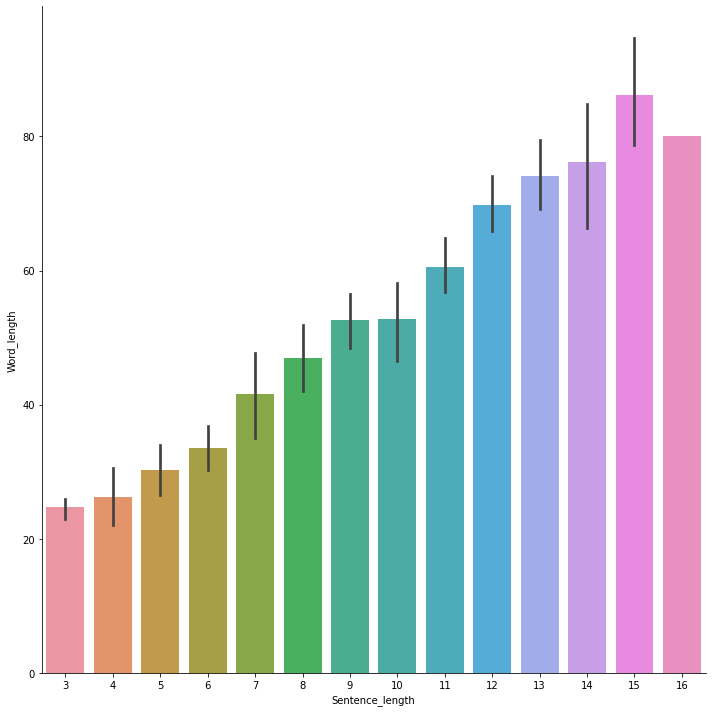

In [56]:
#Camparision Plot between sentence length and word length for observing word length per sentencelength
sns.factorplot(data=data, x='Sentence_length', y='Word_length', kind='bar', size=10)

In [57]:
#Getting unique words dictionary without stopwords
unique=[]
for word in corpus:
    if word not in unique:
        unique.append(word)

In [58]:
#Length of unique words
len(unique)

501

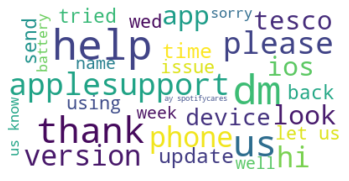

In [59]:
#WordCloud of the data
word=" ".join(word for word in (data['no_stopwords'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


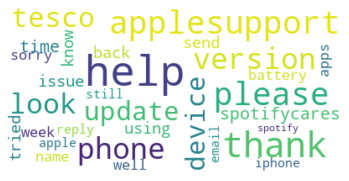

In [60]:
#WordCloud of the data after removing 3 length words from the data
word=" ".join(word for word in (data['nostopwords<3'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


# POS using Corpus

In [61]:
#Loading package from spacy
nlp = spacy.load('en_core_web_sm')

In [62]:
#Defining the corpus document
document = nlp(str(corpus))

In [63]:
#Using document getting Adjectives and its Count
adjs = []
for token in document:
    if token.pos_ == 'ADJ':
        adjs.append(token.text)

#Using counter,getting the most common adjective words and its count from the document
adjs_tally = Counter(adjs)
df = pd.DataFrame(adjs_tally.most_common(), columns=['adj', 'Acount'])
df

,adj,Acount
0,back,6
1,happy,6
2,sorry,5
3,full,4
4,latest,3
...,...,...
71,huge,1
72,keen,1
73,thin,1
74,green,1


In [64]:
#Using document getting Noun and its Count
nouns = []
for token in document:
    if token.pos_ == 'NOUN':
        nouns.append(token.text)

#Using counter,getting the most common noun words and its count from the document
nouns_tally = Counter(nouns)

dfs = pd.DataFrame(nouns_tally.most_common(),columns=['noun', 'Ncount'])
dfs

,noun,Ncount
0,',21
1,dm,19
2,help,18
3,thanks,13
4,applesupport,11
...,...,...
197,layout,1
198,item,1
199,slowdown,1
200,line,1


In [65]:
#Using document getting Verb and its Count
verbs = [token.text for token in document if token.pos_ == 'VERB']


#Using counter,getting the most common verb words and its count from the document
verbs_tally = Counter(verbs)

dfv = pd.DataFrame(verbs_tally.most_common(), columns=['verb', 'Vcount'])
dfv

,verb,Vcount
0,let,8
1,get,8
2,look,7
3,tried,6
4,send,6
...,...,...
155,responding,1
156,finding,1
157,removing,1
158,faves,1


In [66]:
#Using document getting Adverb and its Count
adverbs = []
for token in document:
    if token.pos_ == 'ADV':
        adverbs.append(token.text)

#Using counter,getting the most common adverb words and its count from the document
adverbs_tally = Counter(adverbs)

dfa = pd.DataFrame(adverbs_tally.most_common(), columns=['adverb', 'ADcount'])
dfa 


,adverb,ADcount
0,still,4
1,always,3
2,together,3
3,away,2
4,frequently,2
5,immediately,2
6,really,1
7,shortly,1
8,suddenly,1
9,also,1


In [67]:
#Creating single DataFrame of Adjective, Noun, Verb & Adverb with its counts
a = dfs[["noun", "Ncount"]]
b = df.join(a)
c = dfv[['verb', 'Vcount']]
d = b.join(c)
e = dfa[['adverb', 'ADcount']]
dt = d.join(e)
dt.head()

,adj,Acount,noun,Ncount,verb,Vcount,adverb,ADcount
0,back,6,',21,let,8,still,4.0
1,happy,6,dm,19,get,8,always,3.0
2,sorry,5,help,18,look,7,together,3.0
3,full,4,thanks,13,tried,6,away,2.0
4,latest,3,applesupport,11,send,6,frequently,2.0


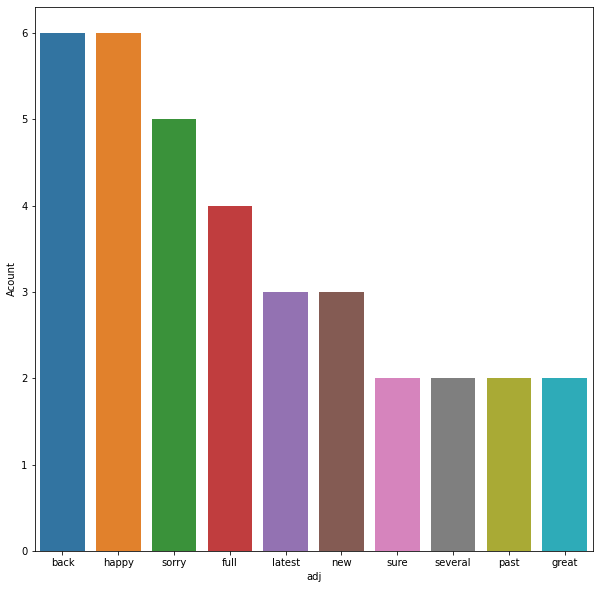

In [68]:
#Plot for Adjective and its Count
fig = plt.figure(figsize=(10,10))
sns.barplot(x=dt.adj[:10], y=dt.Acount)
plt.show()

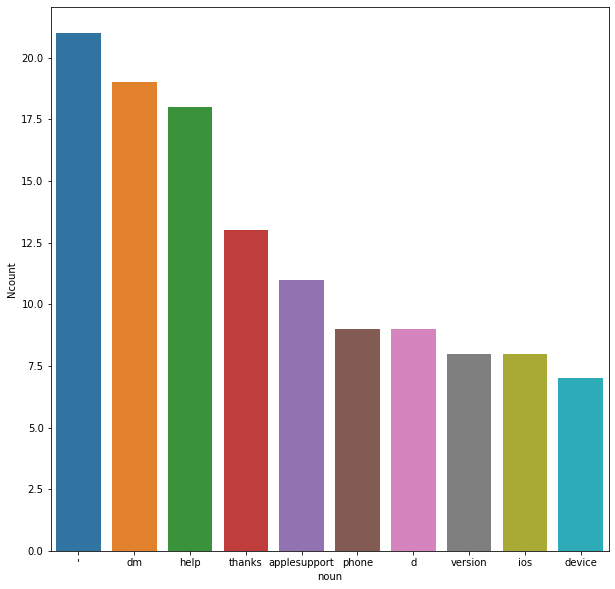

In [69]:
#Plot for Noun & its Count
fig = plt.figure(figsize=(10,10))
sns.barplot(x=dt.noun[:10], y=dt.Ncount)
plt.show()

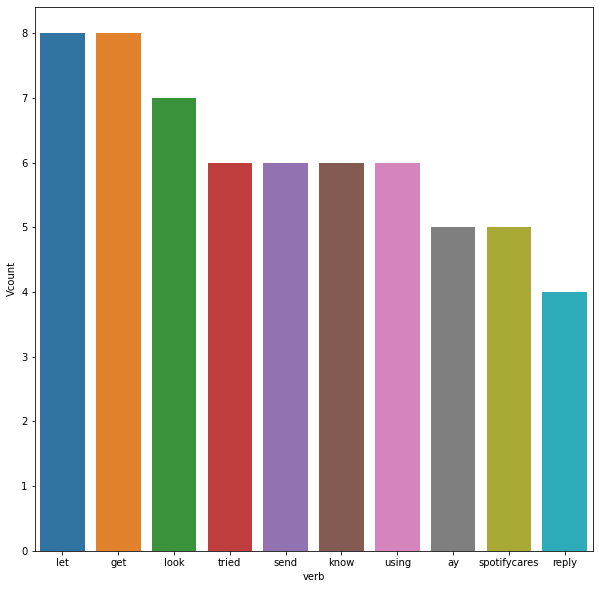

In [70]:
#Plot for Verb & its Count
fig = plt.figure(figsize=(10,10))
sns.barplot(x=dt.verb[:10], y=dt.Vcount)
plt.show()

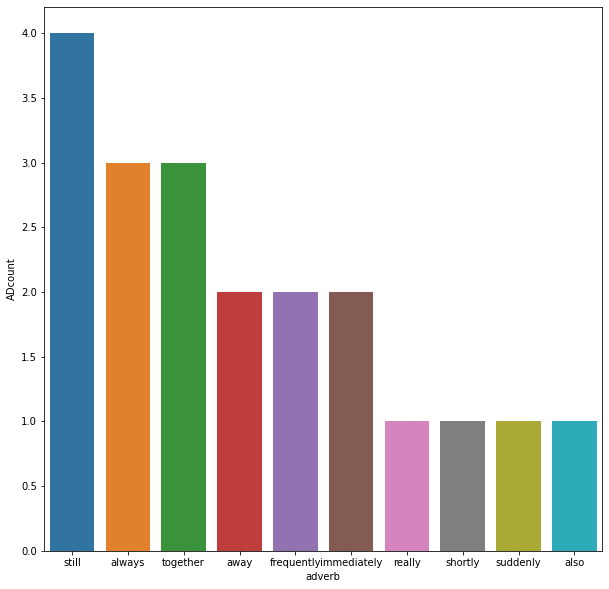

In [71]:
#Plot for Adverb & its Count
fig = plt.figure(figsize=(10,10))
sns.barplot(x=dt.adverb[:10], y=dt.ADcount)
plt.show()

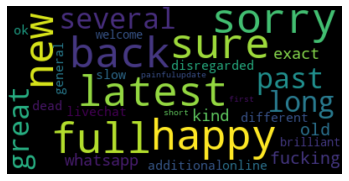

In [72]:
#WordCloud of Adjectives
word=" ".join(word for word in (dt['adj'].values))
wc = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
plt.imshow(wc, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


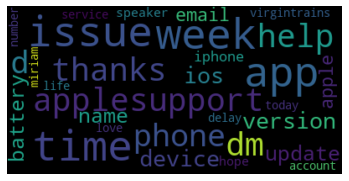

In [73]:
#WordCloud of Nouns
word=" ".join(word for word in (dt['noun'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

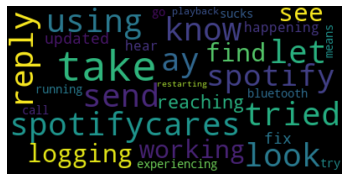

In [74]:
#WordCloud of Verbs
word=" ".join(word for word in (dt['verb'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


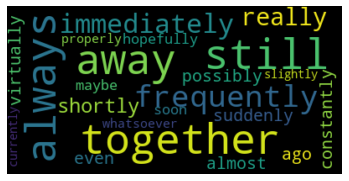

In [75]:
#WordCloud of Adverbs
word=" ".join(word for word in (dfa['adverb'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


In [76]:
#Plotting DataFrame of Adjective,Noun,Verb and Adverbs Counts of top 15 words
plotdt = pd.DataFrame(data = dt, columns=['Acount', 'Ncount', 'Vcount', 'ADcount'])
plotdt[:15]

,Acount,Ncount,Vcount,ADcount
0,6,21,8,4.0
1,6,19,8,3.0
2,5,18,7,3.0
3,4,13,6,2.0
4,3,11,6,2.0
5,3,9,6,2.0
6,2,9,6,1.0
7,2,8,5,1.0
8,2,8,5,1.0
9,2,7,4,1.0


<AxesSubplot:>

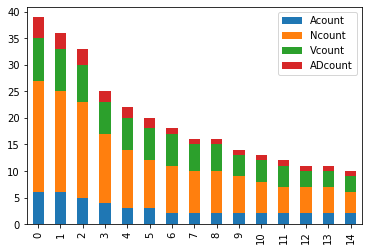

In [77]:
#Plotting BarPlot for the Comparision between Adjective, Noun, Verb and Adverb with top 15 words
plotdt[:15].plot(kind='bar', stacked = True)